In [1]:
import pickle as pk
import numpy as np
from normalization import *
import torch
from dataloader import combine_sparse_tensors
from tqdm import tqdm
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

/home/yangxiaojie/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics.pairwise import cosine_similarity 

In [4]:
device = 'cuda:0'
causal_model = torch.load('/home/yangxiaojie/KDD2025/model/models/model_5119_1111_True.pth').to(device)

In [7]:
news = pd.read_csv('/home/yangxiaojie/KDD2025/samples・説明書/news_latest_0712.csv')

In [11]:
news

,InBClass,DateAndTime,InNewsGenre,InJpnAreaName,InHeadLine,Content,codes,event_time,emergency,event_score
0,"災害・事故, 気象",2023-04-01 05:47:25,社会,"鹿児島県, 沖縄県, 鹿児島県鹿児島市",沖永良部島で震度１,１日午前５時２８分ごろ、鹿児島県の沖永良部島知名瀬利覚で震度１の地震があった。気象庁によると...,"['47201', '47205', '47207', '47208', '47209', ...",2023-04-01 05:28:00,Yes,"[-0.3, 0.0, 0.0, 0.3, 0.0, 0.2, 0.4, 0.2, 0.0,..."
1,"災害・事故, 気象",2023-04-01 06:16:04,社会,"千葉県, 茨城県, 茨城県水戸市, 千葉県千葉市",茨城、千葉で震度２,１日午前６時６分ごろ、茨城、千葉両県で震度２の地震があった。気象庁によると、震源地は千葉県東...,"['08201', '12101', '12102', '12103', '12104', ...",2023-04-01 06:06:00,Yes,"[-0.8, 0.0, 0.0, 0.8, 0.5, 0.6, 0.9, 0.7, 0.3,..."
2,"災害・事故, 気象",2023-04-01 08:07:34,社会,"鹿児島県, 沖縄県, 鹿児島県鹿児島市",鹿児島で地震相次ぐ,１日午前５時２８分ごろ、鹿児島県の沖永良部島知名瀬利覚で震度１の地震があった。午前７時４６分...,"['47201', '47205', '47207', '47208', '47209', ...",2023-04-01 07:28:00,No,"[0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.5, 0.0, ..."
3,犯罪・司法,2023-04-01 08:52:56,社会,"北海道札幌市, 北海道, 北海道函館市, 北海道旭川市, 北海道釧路市, 北海道札幌市西区",男児暴行疑い１７歳少年逮捕 札幌、「殴っていない」,札幌・西署は３月３１日夜、１０歳未満の男児の顔を殴ったとして、暴行容疑で、札幌市西区西町北４...,"['01202', '01204', '01206', '01107']",2023-04-01 05:28:00,Yes,"[-0.8, 0.0, 0.0, 0.8, 0.0, 0.3, 0.6, 0.4, 0.2,..."
4,"災害・事故, 環境, 健康, 犯罪・司法",2023-04-01 11:22:25,社会,"北海道, 北海道札幌市, 北海道函館市, 北海道旭川市, 北海道釧路市, 北海道厚岸郡厚岸町",番外９ 北海道厚岸町でクマに襲われ女性けが,北海道警によると、１日午前９時ごろ、北海道厚岸町で、散歩中の３０代女性がクマに襲われ、頭部な...,"['01101', '01102', '01103', '01104', '01105', ...",2023-04-01 01:40:00,Yes,"[-0.8, 0.0, 0.0, 0.8, 0.3, 0.4, 0.9, 0.6, 0.2,..."
...,...,...,...,...,...,...,...,...,...,...
20614,スポーツ,2024-03-31 19:04:58,運動,東京都,前を向く河村 Ｂリーグから（２）完,〇…横浜ＢＣはＡ東京のインサイドの強さに圧倒され、序盤からリードを許す苦しい展開となった。昨...,"['13100', '13101', '13102', '13103', '13104', ...",2024-03-31 00:00:00,No,"[0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
20615,スポーツ,2024-03-31 19:10:42,野球,石川県,森下一発、トンネル抜ける 阪神初勝利「一本出せば」,トンネルの出口を、一振りで切り開いた。阪神待望の今季初得点は、開幕から２６イニング目の八回。...,"['17201', '17202', '17203', '17204', '17205', ...",2024-03-31 19:00:00,No,"[0.0, 0.0, 0.8, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
20616,スポーツ,2024-03-31 19:37:41,運動,滋賀県,Ａ千葉が５０勝目 バスケＢリーグ２部,バスケットボール男子のＢリーグ２部（Ｂ２）は３１日、千葉ポートアリーナなどで６試合が行われ、...,"['25201', '25202', '25203', '25204', '25206', ...",2024-03-31 00:00:00,No,"[0.0, 0.0, 0.2, 0.2, 0.0, 0.3, 0.0, 0.0, 0.0, ..."
20617,"社会, 健康",2024-03-31 20:41:18,大社,"京都府, 京都府京都市, 京都府京都市山科区, 東京都",大谷修氏死去 真宗大谷派鍵役,大谷修氏（おおたに・おさむ＝真宗大谷派鍵役、大谷暢裕おおたに・ちょうゆう門首の親のいとこ）３...,"['26110', '13100', '13101', '13102', '13103', ...",2024-03-30 05:20:00,No,"[0.0, 0.0, 0.2, 0.2, 0.0, 0.4, 0.0, 0.0, 0.0, ..."


In [179]:
labels_translation = {
    'スポーツ': 'Sports',
    '健康': 'Health',
    '教育': 'Education',
    '文化': 'Culture',
    '気象': 'Weather',
    '災害・事故': 'Disasters',
    '犯罪・司法': 'Crime',
    '社会': 'Society',
}

In [67]:
news['InBClass'].unique()

array(['災害・事故, 気象', '犯罪・司法', '災害・事故, 環境, 健康, 犯罪・司法', ...,
       '犯罪・司法, 災害・事故, 健康, 生活・余暇, 社会', 'スポーツ, 気象, 災害・事故',
       '災害・事故, 気象, スポーツ, 教育'], dtype=object)

In [136]:
allencoded = []
labels = []
cate = []
with torch.no_grad():
    causal_model.eval()
    for i, row in news.iterrows():
        score = eval(row['event_score'])
        pred = row['emergency']
        prev_treat = torch.FloatTensor(score).reshape(1, 1, 1, 10).repeat(1, 24, 490, 1)
        if pred == 'Yes':
            post_treat = prev_treat
        else:
            post_treat = torch.zeros_like(prev_treat)
        treat = torch.cat([prev_treat, post_treat], dim = 1).to(device)
        x = None
        encoded_treat = causal_model.treat_encoder(x, treat)[0, :]
    
        
        for l in row['InBClass'].split(', '):
            if l in labels_translation:
                
                if score[2] > 0 and score[0] == 0 and pred == 'Yes':
                    cate.append('Positive Predictable')
                elif score[2] == 0 and score[0] < 0 and pred == 'Yes':
                    cate.append('Negative Predictable')
                elif score[2] > 0 and score[0] == 0 and pred == 'No':
                    cate.append('Positive Unpredictable')
                elif score[2] == 0 and score[0] < 0 and pred == 'No':
                    cate.append('Negative Unpredictable')
                else:
                    cate.append('Other')
                
                labels.append(l)
                allencoded.append(encoded_treat.cpu().numpy().tolist())
                break

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 假设 features 是一个形状为 (n_samples, 64) 的numpy数组，labels 是一个形状为 (n_samples,) 的numpy数组
# 你需要将自己的数据赋值给这两个变量
features = np.array(allencoded)
# labels = np.array([...])

In [138]:
import matplotlib.cm as cm

In [139]:
#
# 创建t-SNE对象，将维度降到2
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features)

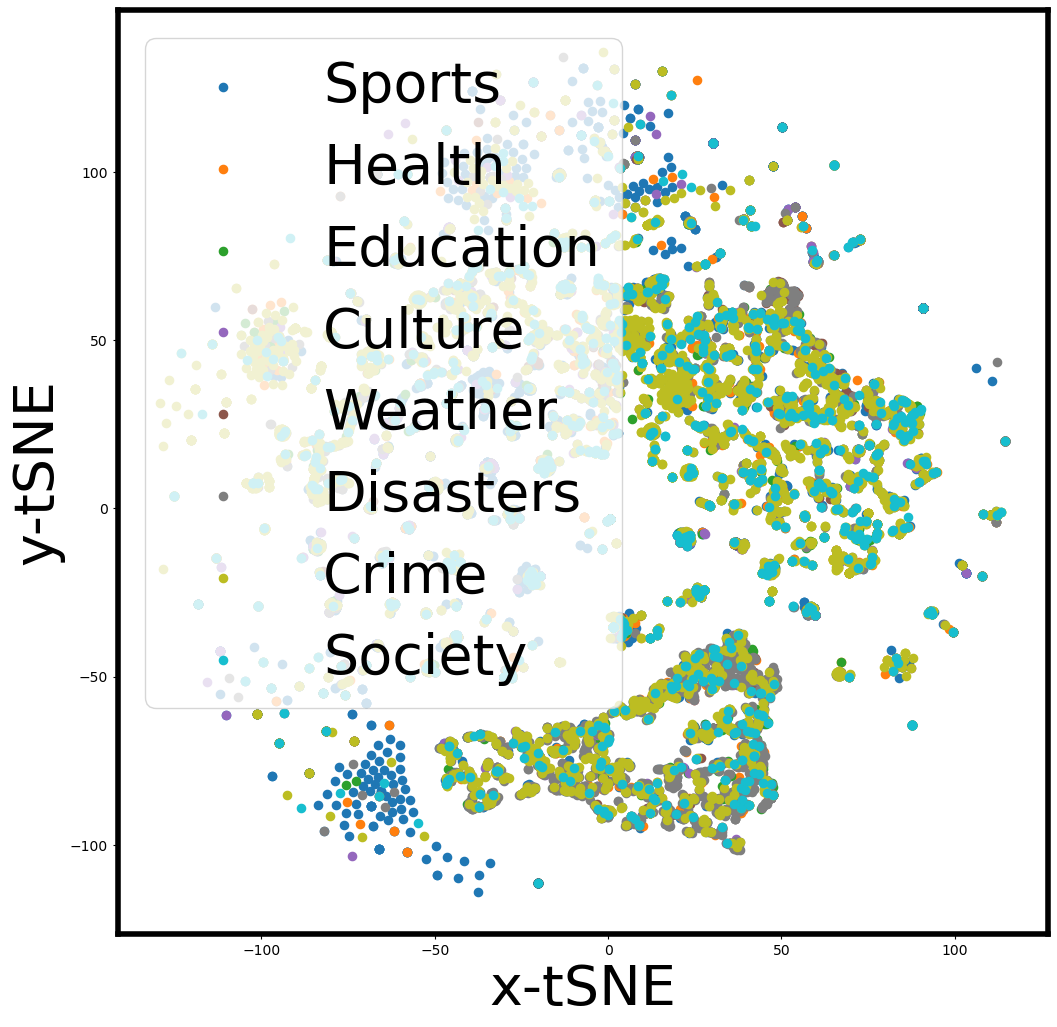

In [237]:
# 创建一个散点图，使用不同的颜色表示不同的字符标签
lw = 4
labels = np.array(labels)
plt.figure(figsize=(12, 12))
unique_labels = np.unique(labels)
colors = cm.tab10(np.linspace(0, 1, len(unique_labels)))  # 使用tab10颜色方案
for i, label in enumerate(unique_labels):
    indices = labels == label
    if label in labels_translation:
        plt.scatter(features_2d[indices, 0], features_2d[indices, 1], label=labels_translation[label], color=colors[i], s = 35)

plt.legend(loc='best', ncol=4, fontsize=40)
ax = plt.gca()
ax.spines['top'].set_linewidth(lw)
ax.spines['right'].set_linewidth(lw)
ax.spines['bottom'].set_linewidth(lw)
ax.spines['left'].set_linewidth(lw)

# 设置坐标轴标签
plt.xlabel('x-tSNE', fontsize=40)
plt.ylabel('y-tSNE', fontsize=40)

# 显示图像
plt.show()

In [241]:
replace_label = {'Negative Predictable': 'NP',
                'Negative Unpredictable': 'NU',
                'Positive Predictable': 'PP',
                'Positive Unpredictable': 'PU',
                'Other': 'Other'}

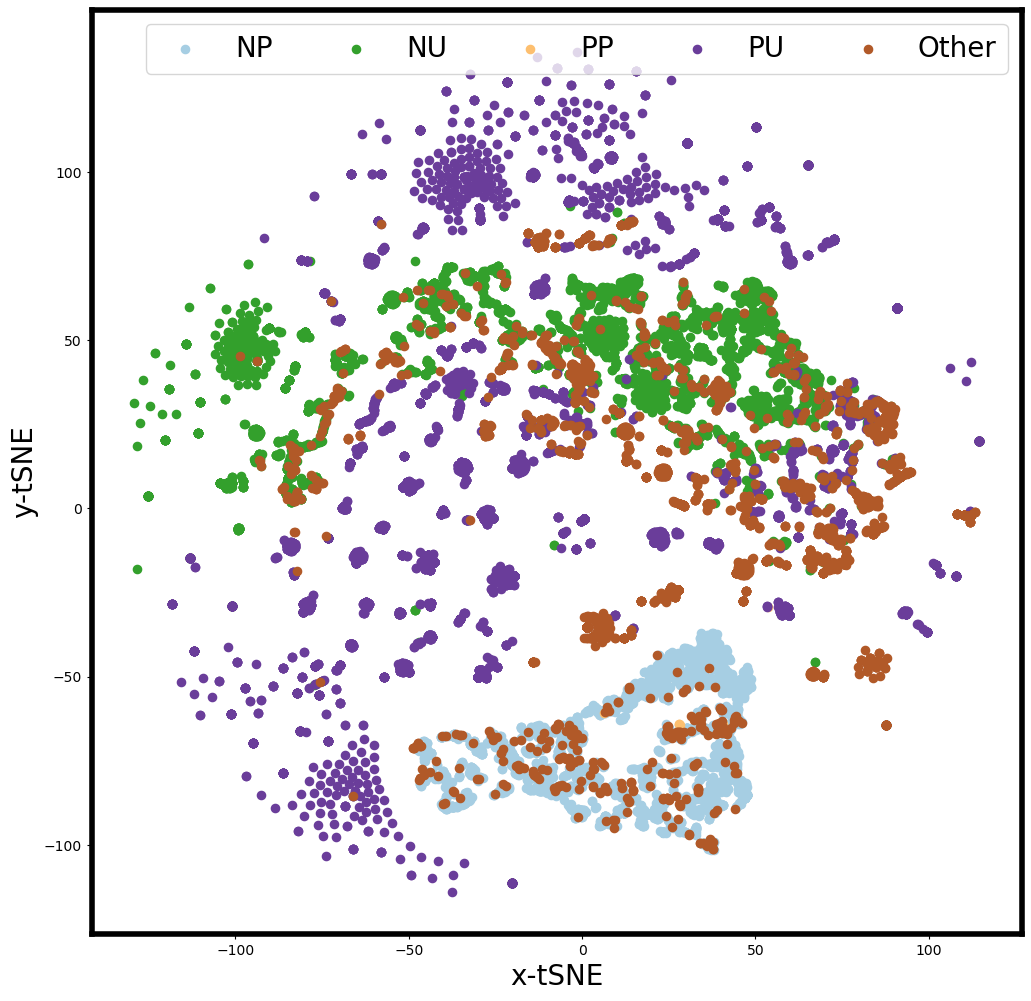

In [232]:
# 创建一个散点图，使用不同的颜色表示不同的字符标签
cate = np.array(cate)
plt.figure(figsize=(12, 12))
unique_cate = np.unique(cate)
colors = cm.Paired(np.linspace(0, 1, len(unique_cate)))  # 使用tab10颜色方案
for i, c in enumerate(repalce_label):
    indices = cate == c
    plt.scatter(features_2d[indices, 0], features_2d[indices, 1], label=repalce_label[c], color=colors[i], s = 35)

plt.legend(loc='best', ncol=5, fontsize=20)
ax = plt.gca()
ax.spines['top'].set_linewidth(lw)
ax.spines['right'].set_linewidth(lw)
ax.spines['bottom'].set_linewidth(lw)
ax.spines['left'].set_linewidth(lw)

# 设置坐标轴标签
plt.xlabel('x-tSNE', fontsize=20)
plt.ylabel('y-tSNE', fontsize=20)

# 显示图像
plt.show()

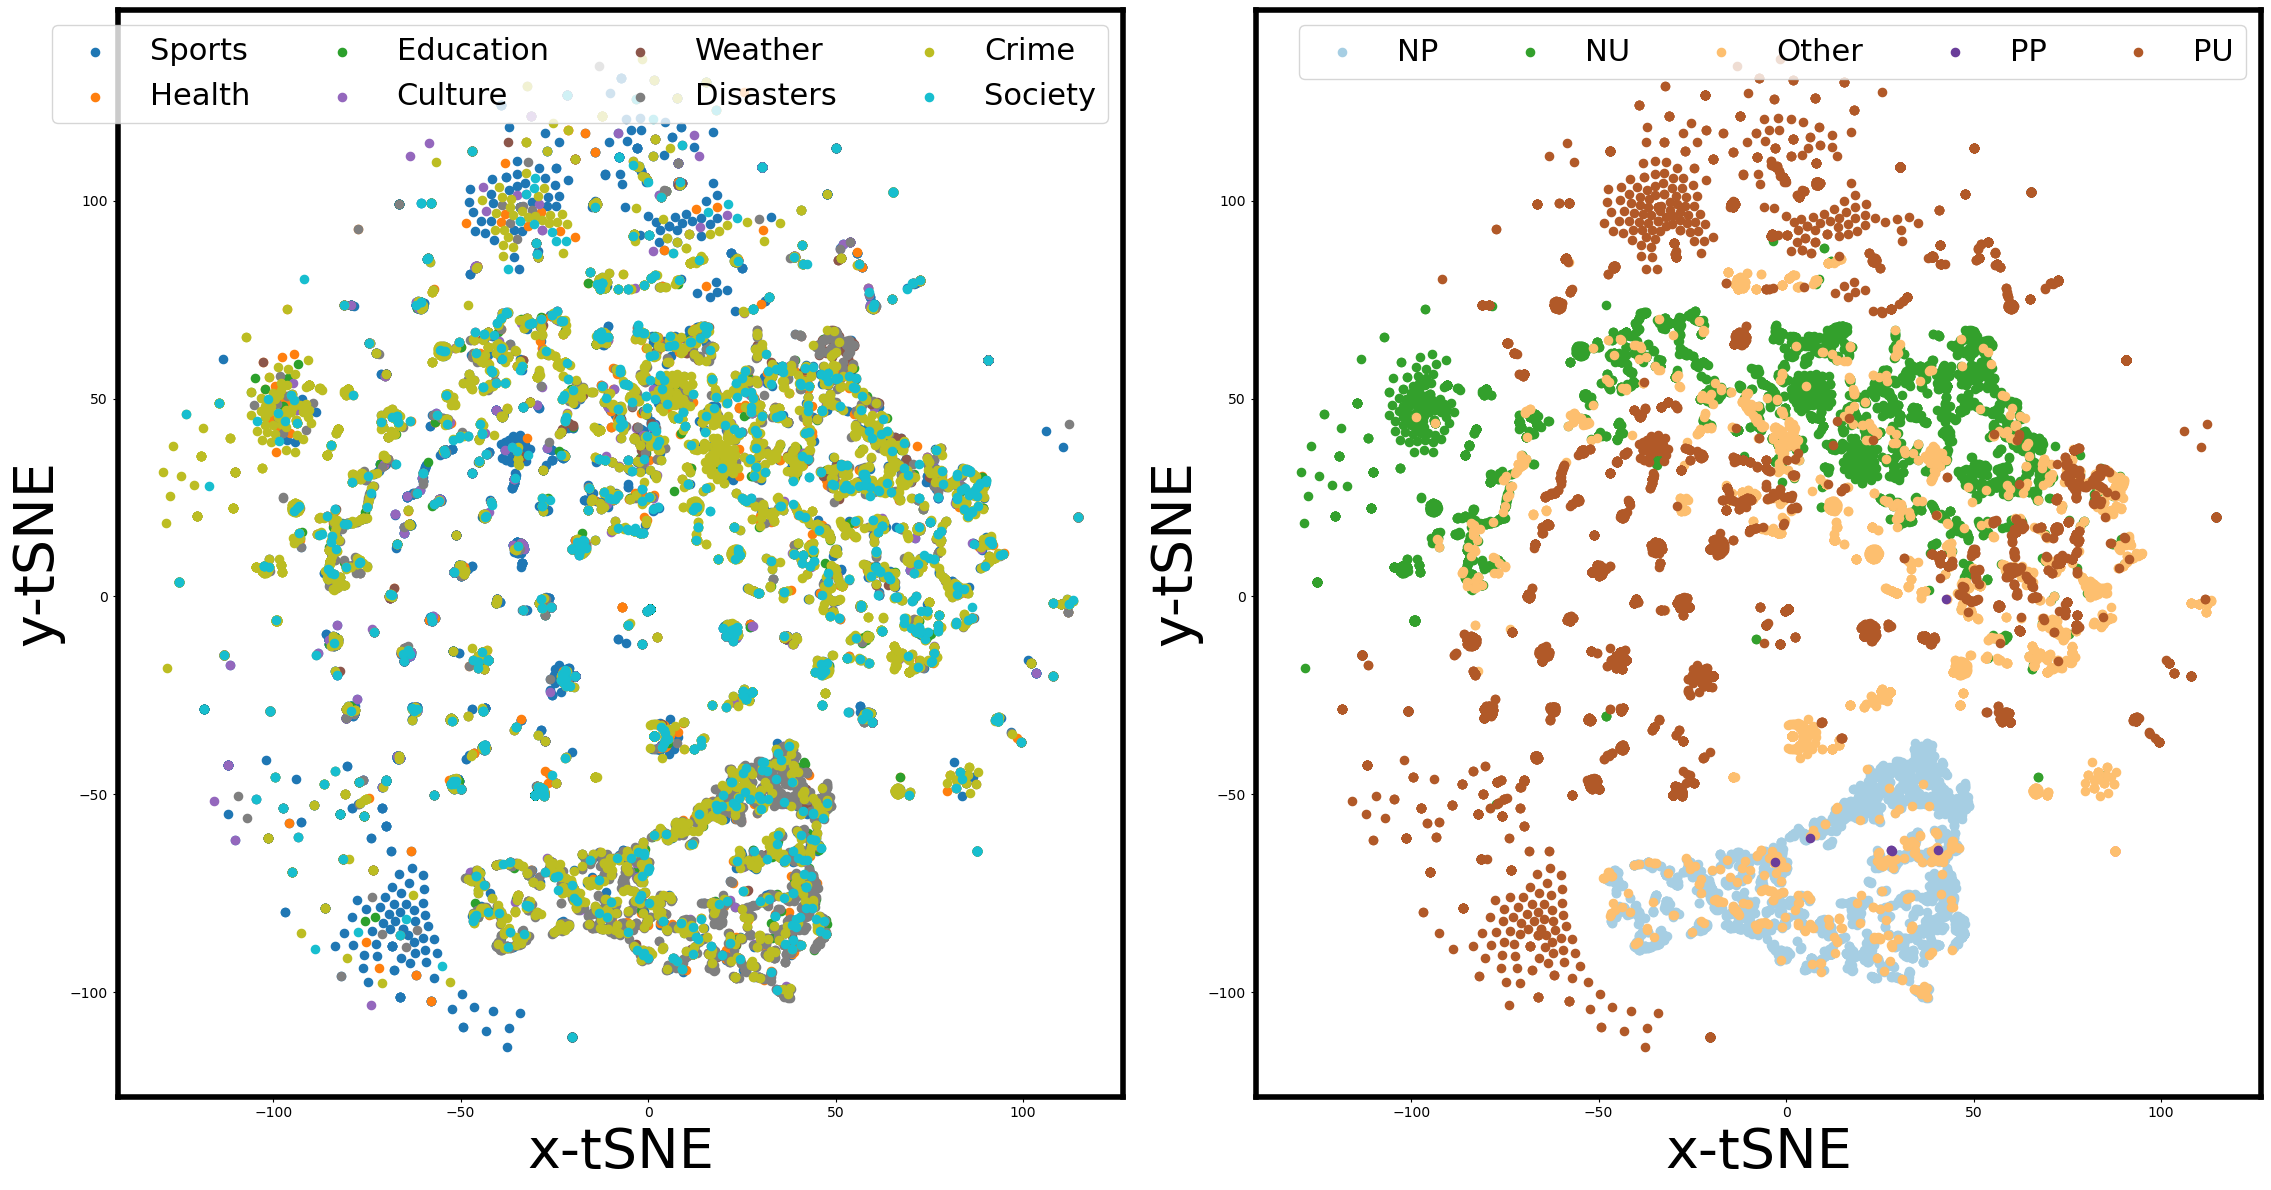

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [245]:
# 设置边框宽度
lw = 4
fontsize = 22

# 创建左右排布的子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

# 第一个散点图
unique_labels = np.unique(labels)
colors = cm.tab10(np.linspace(0, 1, len(unique_labels)))  # 使用tab10颜色方案
for i, label in enumerate(unique_labels):
    indices = labels == label
    if label in labels_translation:
        ax1.scatter(features_2d[indices, 0], features_2d[indices, 1], label=labels_translation[label], color=colors[i], s=35)

ax1.legend(loc='best', ncol=4, fontsize=fontsize)
ax1.spines['top'].set_linewidth(lw)
ax1.spines['right'].set_linewidth(lw)
ax1.spines['bottom'].set_linewidth(lw)
ax1.spines['left'].set_linewidth(lw)
ax1.set_xlabel('x-tSNE', fontsize=40)
ax1.set_ylabel('y-tSNE', fontsize=40)
#ax1.set_title('First Scatter Plot', fontsize=20)

# 第二个散点图
unique_cate = np.unique(cate)
colors = cm.Paired(np.linspace(0, 1, len(unique_cate)))  # 使用Paired颜色方案
for i, c in enumerate(unique_cate):
    indices = cate == c
    ax2.scatter(features_2d[indices, 0], features_2d[indices, 1], label=replace_label[c], color=colors[i], s=35)

ax2.legend(loc='best', ncol=5, fontsize=fontsize)
ax2.spines['top'].set_linewidth(lw)
ax2.spines['right'].set_linewidth(lw)
ax2.spines['bottom'].set_linewidth(lw)
ax2.spines['left'].set_linewidth(lw)
ax2.set_xlabel('x-tSNE', fontsize=40)
ax2.set_ylabel('y-tSNE', fontsize=40)
#ax2.set_title('Second Scatter Plot', fontsize=20)

# 显示图像
plt.tight_layout()
plt.show()
plt.save('score_vis.png', dpi = 300)